In [ ]:
import numpy as np
import pandas as pd

In [ ]:
country = pd.read_csv("/content/Metadata_Country.csv")
population = pd.read_csv("/content/country_population.csv")
fertility = pd.read_csv("/content/fertility_rate.csv")
life_expectancy = pd.read_csv("/content/life_expectancy.csv")

In [ ]:
country.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba,NaN
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra,NaN


In [ ]:
country = country[['Country Code', 'Region']]
print(country.shape)

(263, 2)


In [ ]:
country.isna().sum()

Country Code     0
Region          46
dtype: int64

In [ ]:
population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [ ]:
population.isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              4
                 ..
2012              2
2013              2
2014              2
2015              2
2016              2
Length: 61, dtype: int64

In [ ]:
years = [str(i) for i in range(1960,2017)] #to access the list of all the years from 1960 to 2017

In [ ]:
population.drop(['Indicator Name','Indicator Code'],axis = 1, inplace = True)

In [ ]:
population.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [ ]:
population.shape

(264, 59)

In [ ]:
population.dropna(axis=0, inplace=True)  #to remove null values from population column

In [ ]:
population.shape

(258, 59)

In [ ]:
data = pd.melt(population,
             id_vars ='Country Code',
             value_vars = years,
             var_name ='Year',
             value_name = 'Population'
             )

data.head()

,Country Code,Year,Population
0,ABW,1960,54211.0
1,AFG,1960,8996351.0
2,AGO,1960,5643182.0
3,ALB,1960,1608800.0
4,AND,1960,13411.0


In [ ]:
data.isna().sum()

Country Code    0
Year            0
Population      0
dtype: int64

In [ ]:
data.tail()

,Country Code,Year,Population
14701,XKX,2016,1816200.0
14702,YEM,2016,27584213.0
14703,ZAF,2016,56015473.0
14704,ZMB,2016,16591390.0
14705,ZWE,2016,16150362.0


In [ ]:
data['Country Code'].value_counts()

ABW    57
PYF    57
MWI    57
MYS    57
NAC    57
       ..
GUY    57
HIC    57
HKG    57
HND    57
ZWE    57
Name: Country Code, Length: 258, dtype: int64

In [ ]:
data.shape

(14706, 3)

In [ ]:
258 * 57

14706

In [ ]:
data.head()

,Country Code,Year,Population
0,ABW,1960,54211.0
1,AFG,1960,8996351.0
2,AGO,1960,5643182.0
3,ALB,1960,1608800.0
4,AND,1960,13411.0


In [ ]:
country.head()

,Country Code,Region
0,ABW,Latin America & Caribbean
1,AFG,South Asia
2,AGO,Sub-Saharan Africa
3,ALB,Europe & Central Asia
4,AND,Europe & Central Asia


In [ ]:
data_merged = pd.merge(country,data,how='left',on='Country Code')
data_merged.head()

,Country Code,Region,Year,Population
0,ABW,Latin America & Caribbean,1960,54211.0
1,ABW,Latin America & Caribbean,1961,55438.0
2,ABW,Latin America & Caribbean,1962,56225.0
3,ABW,Latin America & Caribbean,1963,56695.0
4,ABW,Latin America & Caribbean,1964,57032.0


In [ ]:
data_merged.shape

(14711, 4)

In [ ]:
life_expectancy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,74.576,74.725,74.872,75.016,75.158,75.299,75.440,75.582,75.725,75.867
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.292,32.742,33.185,33.624,34.060,34.495,...,59.694,60.243,60.754,61.226,61.666,62.086,62.494,62.895,63.288,63.673
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.251,33.573,33.914,34.272,34.645,35.031,...,55.096,56.189,57.231,58.192,59.042,59.770,60.373,60.858,61.241,61.547
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.279,63.298,64.187,64.911,65.461,65.848,...,75.656,75.943,76.281,76.652,77.031,77.389,77.702,77.963,78.174,78.345
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
life_expectancy.drop(['Indicator Name', 'Indicator Code'], axis=1, inplace=True)

In [ ]:
data2 = pd.melt(life_expectancy,
                id_vars = 'Country Code',
                value_vars = years,
                var_name = 'Year',
                value_name = 'life_expectancy')

In [ ]:
data2.head()

,Country Code,Year,life_expectancy
0,ABW,1960,65.662
1,AFG,1960,32.292
2,AGO,1960,33.251
3,ALB,1960,62.279
4,AND,1960,NaN


In [ ]:
data2.shape

(15048, 3)

In [ ]:
data_merged.shape

(14711, 4)

In [ ]:
data_merged_2 = pd.merge(data_merged,data2,how='left',on = ['Country Code', 'Year'])
data_merged_2.head()

,Country Code,Region,Year,Population,life_expectancy
0,ABW,Latin America & Caribbean,1960,54211.0,65.662
1,ABW,Latin America & Caribbean,1961,55438.0,66.074
2,ABW,Latin America & Caribbean,1962,56225.0,66.444
3,ABW,Latin America & Caribbean,1963,56695.0,66.787
4,ABW,Latin America & Caribbean,1964,57032.0,67.113


In [ ]:
data_merged_2.shape

(14711, 5)

# **[Using function method instead:-](https://)**

In [ ]:
def preprocess_df(data, value_name):

    years = [str(y) for y in range(1960, 2017)]

    # remove useless columns
    data.drop(['Country Name', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)

    # remove countries with missing value
    data.dropna(axis=0, inplace=True)

    # melt the dataframe to have years in one columns
    data = pd.melt(data,
                 id_vars='Country Code',
                 value_vars=years,
                 var_name='Year',
                 value_name=value_name)

    return data

In [ ]:
country = country[['Country Code', 'Region']]
population = preprocess_df(population, 'Population')
fertility_rate = preprocess_df(fertility, 'Fertility Rate')
life_expectancy = preprocess_df(life_expectancy, 'Life Expectancy')

In [ ]:
# Merge the data into one dataframe
data = pd.merge(country, population, how='left', on='Country Code')
data = pd.merge(data, life_expectancy, how='left', on=['Country Code', 'Year'])
data = pd.merge(data, fertility_rate, how='left', on=['Country Code', 'Year'])

# Remove remaining lines with missing values
# They will appear if a country is in one dataset but not in another one
data.dropna(axis=0, inplace=True)

In [ ]:
data.shape

(10602, 6)

In [ ]:
data.head()

,Country Code,Region,Year,Population,Life Expectancy,Fertility Rate
0,ABW,Latin America & Caribbean,1960,54211.0,65.662,4.820
1,ABW,Latin America & Caribbean,1961,55438.0,66.074,4.655
2,ABW,Latin America & Caribbean,1962,56225.0,66.444,4.471
3,ABW,Latin America & Caribbean,1963,56695.0,66.787,4.271
4,ABW,Latin America & Caribbean,1964,57032.0,67.113,4.059


# **Data Visualisation by Pandas only**

<Axes: ylabel='Region'>

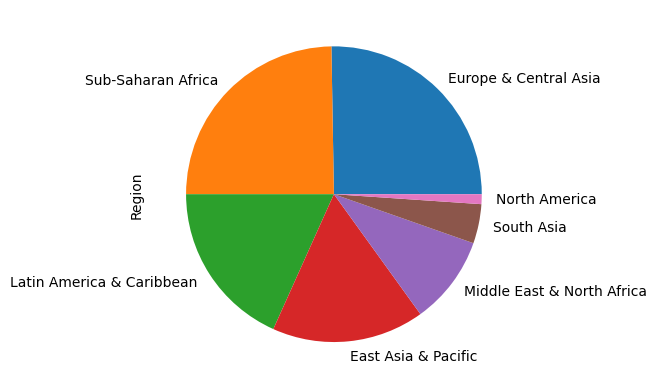

In [ ]:
data['Region'].value_counts().plot(kind='pie')

In [ ]:
data['Country Code'].value_counts()

ABW    57
NZL    57
MYS    57
NAM    57
NCL    57
       ..
GMB    57
GNB    57
GNQ    57
GRC    57
ZWE    57
Name: Country Code, Length: 186, dtype: int64

# **Data Visualisation using Matplotlib**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
max_pop = data['Population'].max()
year = data['Year'][:50]
pop = data['Population'][:50]

In [ ]:
len(year)

50

In [ ]:
len(pop)

50

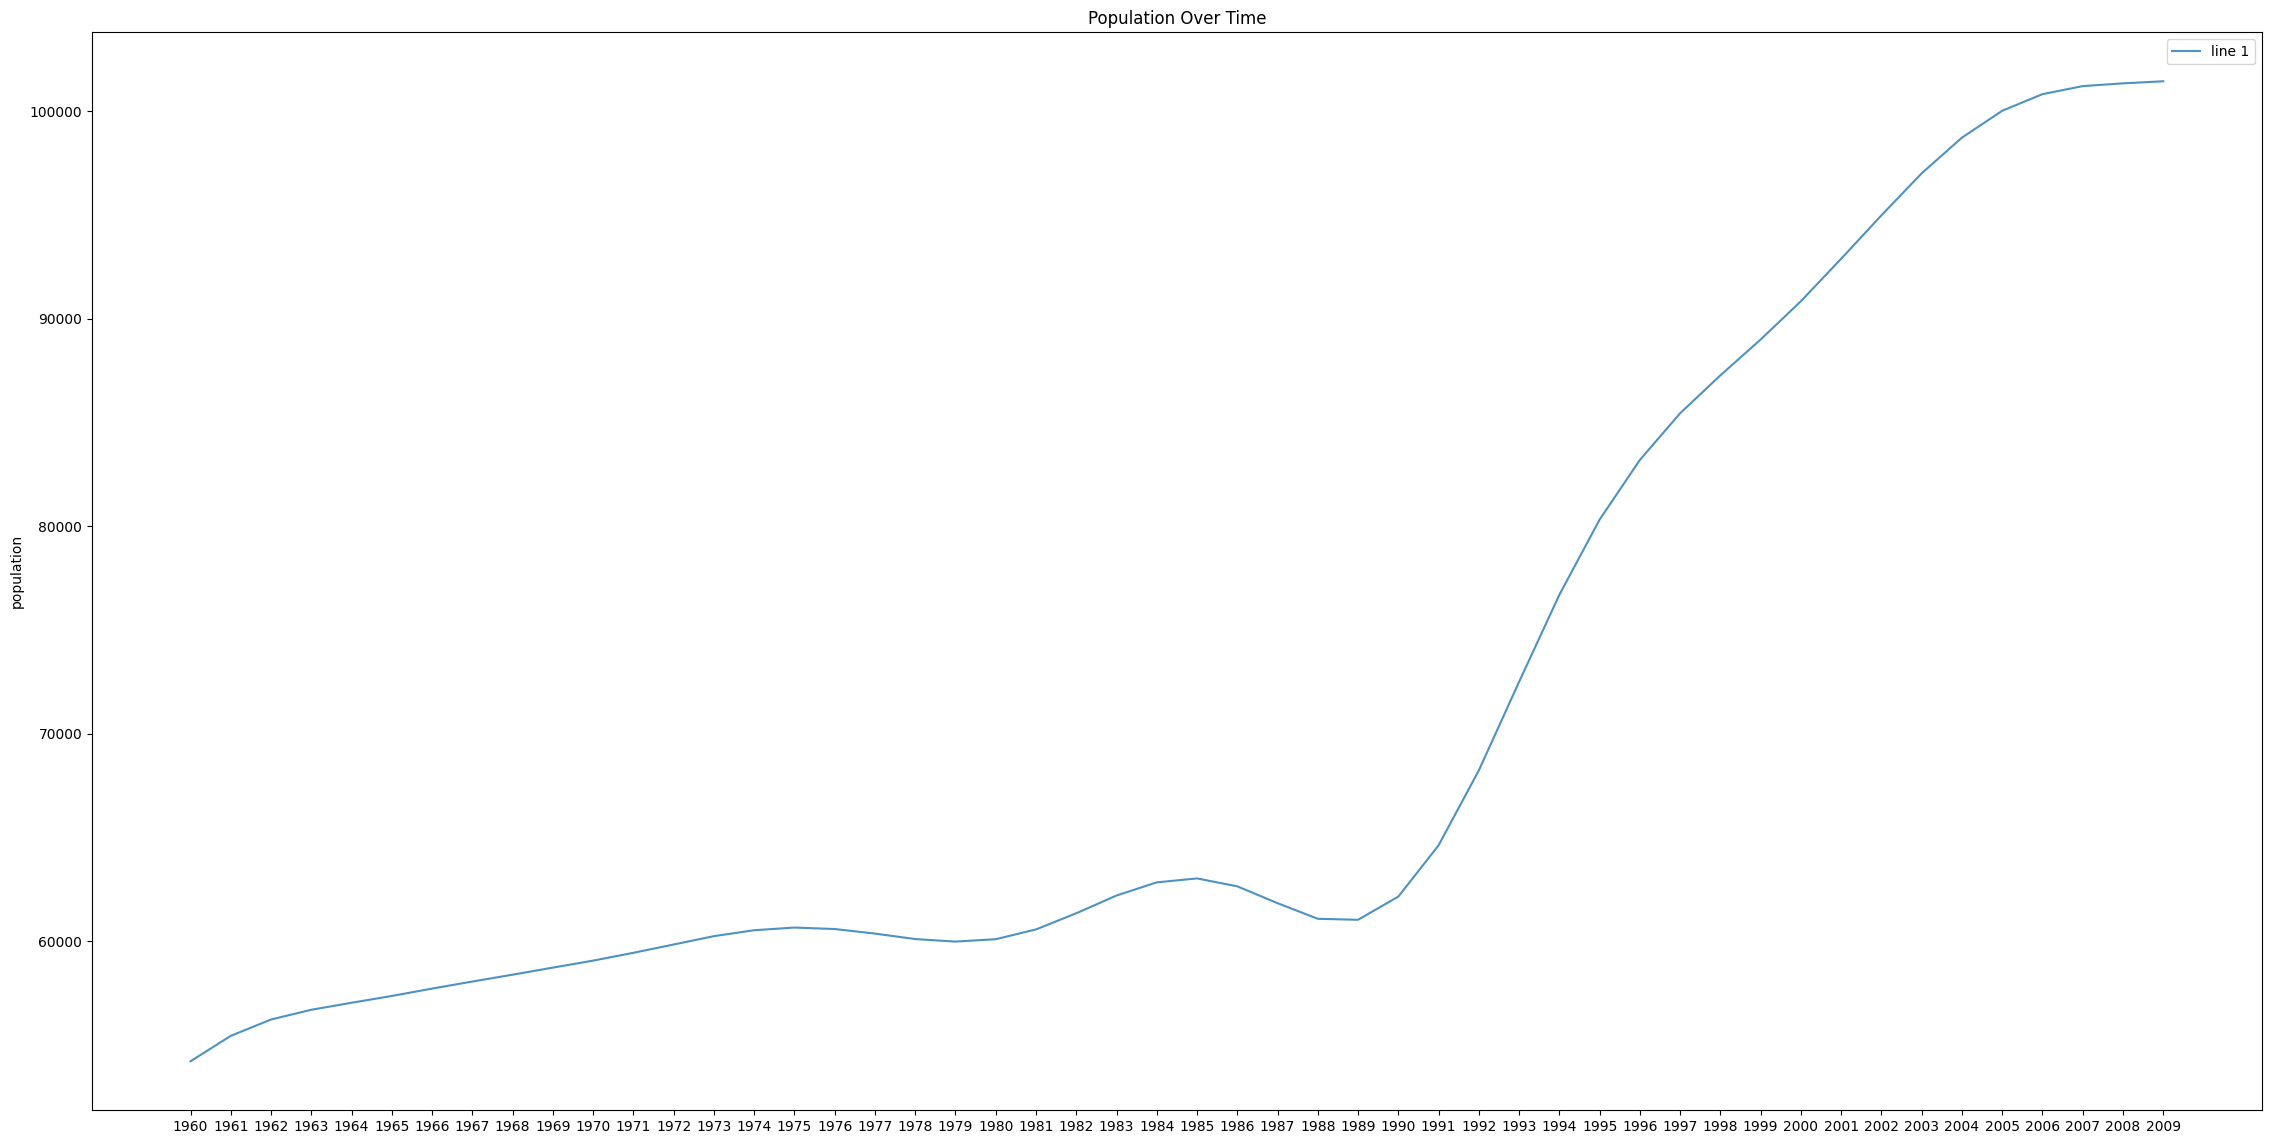

In [ ]:
plt.figure(figsize=(28,14))
plt.plot(year, pop, alpha=0.8, label='line 1')
plt.ylabel('population')
#plt.ylim(40000, 80000)
plt.title('Population Over Time')
plt.legend()
plt.show()

# **Data Visualisation using Plotly**

In [ ]:
import plotly.express as px

In [ ]:
px.scatter(data,
           x="Fertility Rate",
           y="Life Expectancy",
           animation_frame="Year",
           animation_group="Country Code",
           size="Population",
           color="Region",
           hover_name="Country Code",
           log_x=True,
           size_max=55,
           range_x=[1,10],
           range_y=[10,100])

In [ ]:
px.bar(data,
           x="Region",
           y="Population",
           animation_frame="Year",
           animation_group="Country Code",
           color="Region",
           range_y=[0,2500000000])